# Visualising Pre-training Performance

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
# !cp base_results.csv /home/local/data/sophie/imagenet/output/
base_df = pd.read_csv("/home/local/data/sophie/imagenet/output/base_results.csv")
base_df['Weights'] = "base"

grey_df = pd.read_csv("/home/local/data/sophie/imagenet/output/grey_results.csv")
grey_df['Weights'] = "grey_32"

grey_gpu_64_df = pd.read_csv("/home/local/data/sophie/imagenet/output/FullGPU/grey_64_results.csv")
grey_gpu_64_df['Weights'] = "grey_64"

grey_gpu_128_df = pd.read_csv("/home/local/data/sophie/imagenet/output/FullGPU/grey_128_results.csv")
grey_gpu_128_df['Weights'] = "grey_128"

# results_df = pd.concat([base_df,base_gpu_df, grey_df])
# geti_grey_df = pd.read_csv("/home/local/data/sophie/imagenet/output/geti_grey_results.csv")
# geti_grey_df['Weights'] = "geti_grey"
# results_df = pd.concat([base_df,base_gpu_df, grey_df, geti_grey_df])
base_gpu_df = pd.read_csv("/home/local/data/sophie/imagenet/output/FullGPU/base_results.csv")
base_gpu_df['Weights'] = "base_32"

base_gpu_64_df = pd.read_csv("/home/local/data/sophie/imagenet/output/FullGPU/base_64_results.csv")
base_gpu_64_df['Weights'] = "base_64"

base_gpu_128_df = pd.read_csv("/home/local/data/sophie/imagenet/output/FullGPU/base_128_results.csv")
base_gpu_128_df['Weights'] = "base_128"

single_df = pd.read_csv("/home/local/data/sophie/imagenet/output/single_results.csv")
single_df['Weights'] = "single_32"

single_gpu_64_df = pd.read_csv("/home/local/data/sophie/imagenet/output/FullGPU/single_64_results.csv")
single_gpu_64_df['Weights'] = "single_64"

single_gpu_128_df = pd.read_csv("/home/local/data/sophie/imagenet/output/FullGPU/single_128_results.csv")
single_gpu_128_df['Weights'] = "single_128"

single_gpu_256_df = pd.read_csv("/home/local/data/sophie/imagenet/output/FullGPU/single_256_results.csv")
single_gpu_256_df['Weights'] = "single_256"

results_df = pd.concat([
    single_df, single_gpu_64_df, single_gpu_128_df, single_gpu_256_df,
    base_gpu_df, base_gpu_64_df, base_gpu_128_df,
    grey_df, grey_gpu_64_df, grey_gpu_128_df])


<Axes: xlabel='Epoch', ylabel='AP'>

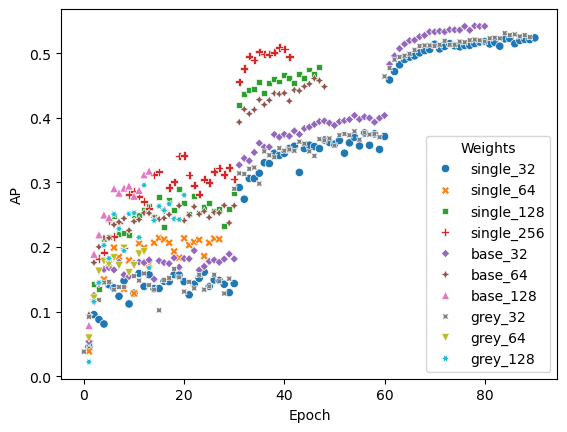

In [122]:
sns.scatterplot(data=results_df[results_df["Epoch"]<=90], x="Epoch", y="AP", hue="Weights",style="Weights")

In [114]:
long_single = single_df[['Epoch', 'AP', 'Top1', 'Top5']].melt(id_vars='Epoch',var_name="Variable",value_name="Value")
long_single['Weights'] = "Single_32"

long_single_64_gpu = single_gpu_64_df[['Epoch', 'AP', 'Top1', 'Top5']].melt(id_vars='Epoch',var_name="Variable",value_name="Value")
long_single_64_gpu['Weights'] = "Single_64"

long_single_128_gpu = single_gpu_128_df[['Epoch', 'AP', 'Top1', 'Top5']].melt(id_vars='Epoch',var_name="Variable",value_name="Value")
long_single_128_gpu['Weights'] = "Single_128"

long_single_256_gpu = single_gpu_256_df[['Epoch', 'AP', 'Top1', 'Top5']].melt(id_vars='Epoch',var_name="Variable",value_name="Value")
long_single_256_gpu['Weights'] = "Single_256"


long_base_gpu = base_gpu_df[['Epoch', 'AP', 'Top1', 'Top5']].melt(id_vars='Epoch',var_name="Variable",value_name="Value")
long_base_gpu['Weights'] = "Base_32"

long_base_64_gpu = base_gpu_64_df[['Epoch', 'AP', 'Top1', 'Top5']].melt(id_vars='Epoch',var_name="Variable",value_name="Value")
long_base_64_gpu['Weights'] = "Base_64"

long_base_128_gpu = base_gpu_128_df[['Epoch', 'AP', 'Top1', 'Top5']].melt(id_vars='Epoch',var_name="Variable",value_name="Value")
long_base_128_gpu['Weights'] = "Base_128"


long_grey = grey_df[['Epoch', 'AP', 'Top1', 'Top5']].melt(id_vars='Epoch',var_name="Variable",value_name="Value")
long_grey['Weights'] = "Grey_32"

long_grey_64_gpu = grey_gpu_64_df[['Epoch', 'AP', 'Top1', 'Top5']].melt(id_vars='Epoch',var_name="Variable",value_name="Value")
long_grey_64_gpu['Weights'] = "Grey_64"

long_grey_128_gpu = grey_gpu_128_df[['Epoch', 'AP', 'Top1', 'Top5']].melt(id_vars='Epoch',var_name="Variable",value_name="Value")
long_grey_128_gpu['Weights'] = "Grey_128"


long_results = pd.concat([long_grey, long_grey_64_gpu, long_grey_128_gpu, 
                          long_base_gpu, long_base_64_gpu, long_base_128_gpu,
                          long_single, long_single_64_gpu,long_single_128_gpu,long_single_256_gpu])
# long_results = pd.concat([long_grey,long_base,long_base_gpu])
long_results.head()

,Epoch,Variable,Value,Weights
0,0,AP,0.038,Grey_32
1,1,AP,0.092,Grey_32
2,2,AP,0.122,Grey_32
3,3,AP,0.118,Grey_32
4,4,AP,0.145,Grey_32


Text(0.5, 0.98, 'ResNet-50 ImageNet Pre-Training Performance')

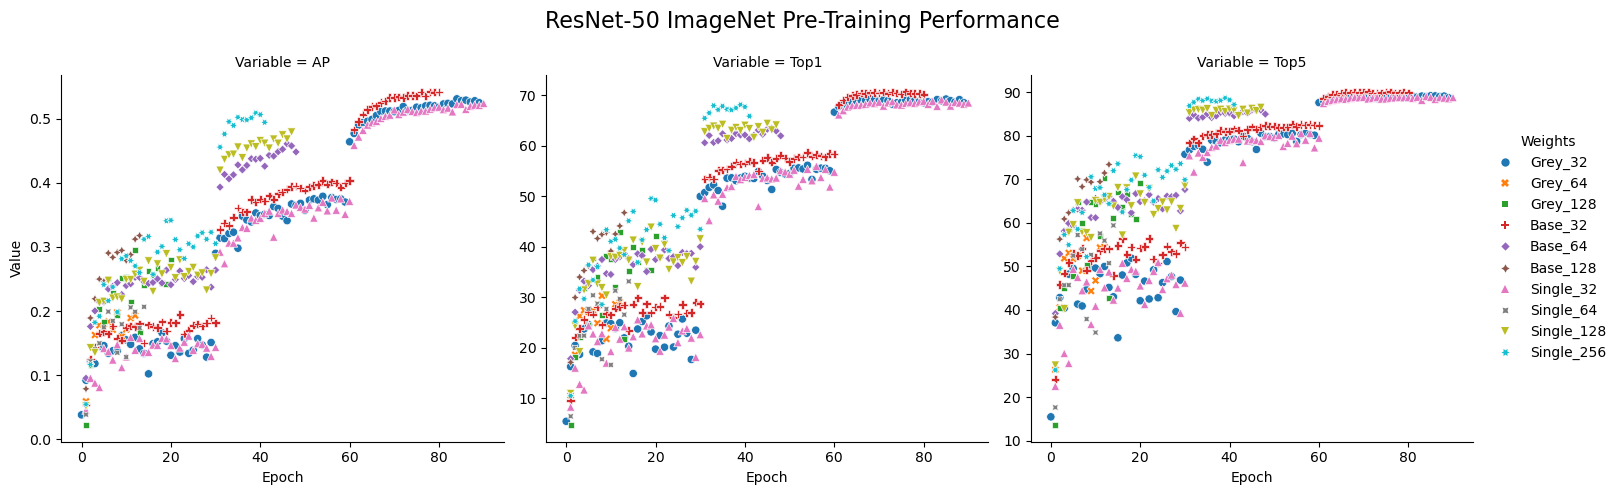

In [115]:
# marker_dict = {
#     "Grey_32" : "v",
#     "Base_32" : "v",
#     "Single_32" : "v",
    
#     "Grey_64" : "P",
#     "Base_64" : "P",
#     "Single_64" : "P",
    
#     "Grey_128" : "^",
#     "Base_128" : "^",
#     "Single_128" : "^",
    
#     "Single_256" : "*",
# }

# colours_dict = {
#     "Grey_32" : "#0535A7",#"navy",
#     "Base_32" : "#6C0E4B",#"darkgreen",
#     "Single_32" :"#1D5F2E" ,#"maroon",
    
#     "Grey_64" : "#325CBF",#"blue",
#     "Base_64" : "#C51D8A",#"limegreen",
#     "Single_64" : "#00A028",#"red",
    
#     "Grey_128" : "#5683EA",#"royalblue",
#     "Base_128" : "#FF77D0",#"lightgreen",
#     "Single_128" : "#36DE60",#"indianred",
    
#     "Single_256" : "#77FF99"# "redcoral",
# }

# metricplot = sns.relplot(data=long_results[long_results["Epoch"]<=90], x="Epoch", y="Value", hue="Weights", col = "Variable", \
#                          facet_kws={'sharey': False, 'sharex': True}, kind="scatter", style="Weights", markers=marker_dict, palette= colours_dict)#)

metricplot = sns.relplot(data=long_results[long_results["Epoch"]<=90], x="Epoch", y="Value", hue="Weights", col = "Variable", \
                         facet_kws={'sharey': False, 'sharex': True}, kind="scatter", style="Weights")
metricplot.fig.subplots_adjust(top=.85)
metricplot.fig.suptitle('ResNet-50 ImageNet Pre-Training Performance', fontsize=16,)# weight='bold')

Text(0.5, 0.98, 'Single Channel ResNet-50 ImageNet Pre-Training Performance')

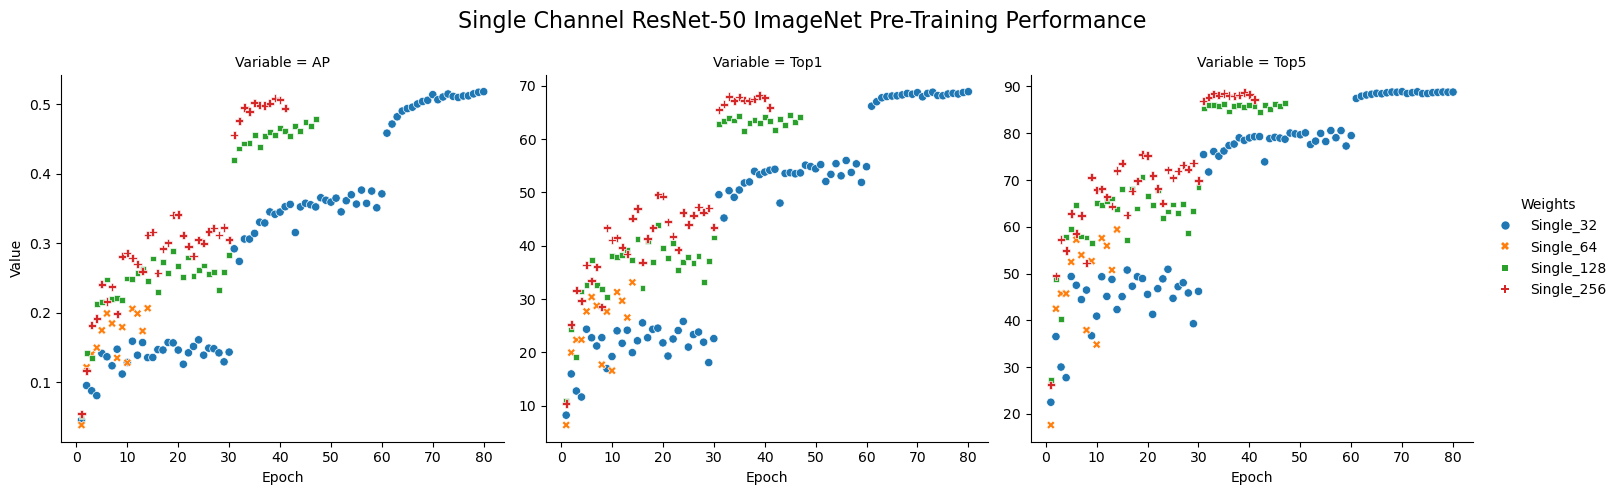

In [120]:
metricplot = sns.relplot(data=long_results.query("('Single_32' in Weights | 'Single_64' in Weights | 'Single_128' in Weights | 'Single_256' in Weights) & Epoch <= 80"), x="Epoch", y="Value", hue="Weights", col = "Variable", \
                         facet_kws={'sharey': False, 'sharex': True}, style="Weights", kind="scatter")
metricplot.fig.subplots_adjust(top=.85)
metricplot.fig.suptitle('Single Channel ResNet-50 ImageNet Pre-Training Performance', fontsize=16,)# weight='bold')

Text(0.5, 0.98, 'Colour Base ResNet-50 ImageNet Pre-Training Performance')

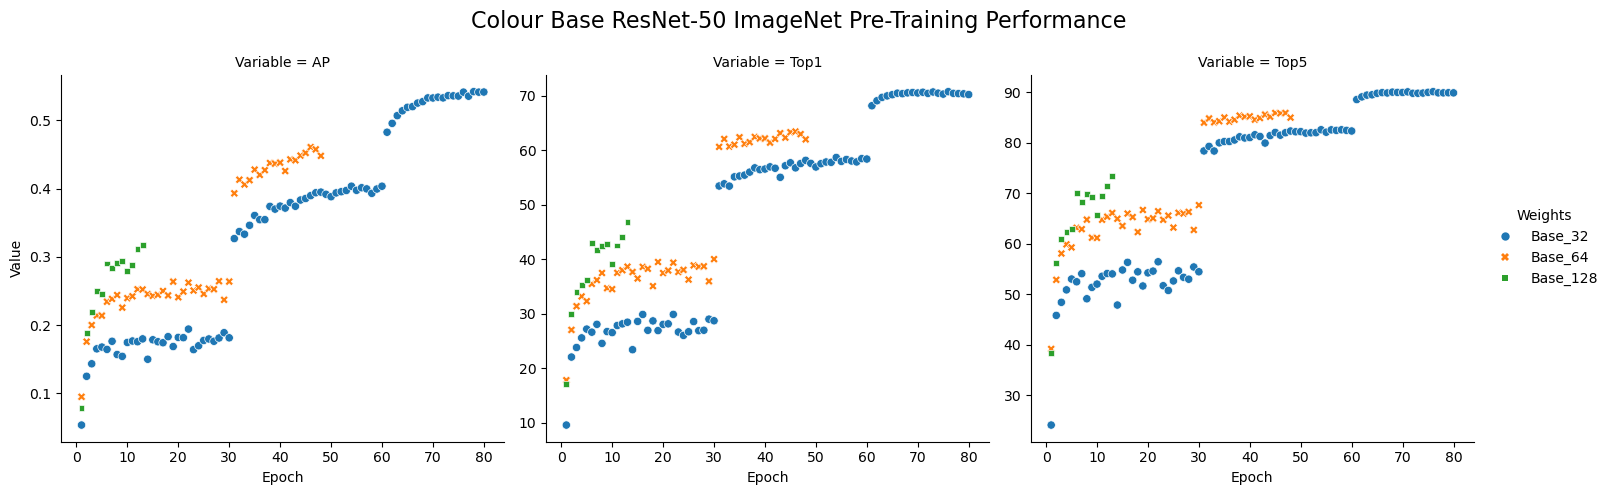

In [118]:
metricplot = sns.relplot(data=long_results.query("('Base_32' in Weights |'Base_64' in Weights |'Base_128' in Weights ) & Epoch <= 80"), x="Epoch", y="Value", hue="Weights", col = "Variable", \
                         facet_kws={'sharey': False, 'sharex': True}, style="Weights", kind="scatter")
metricplot.fig.subplots_adjust(top=.85)
metricplot.fig.suptitle('Colour Base ResNet-50 ImageNet Pre-Training Performance', fontsize=16,)# weight='bold')

Text(0.5, 0.98, 'Colour Base ResNet-50 ImageNet Pre-Training Performance')

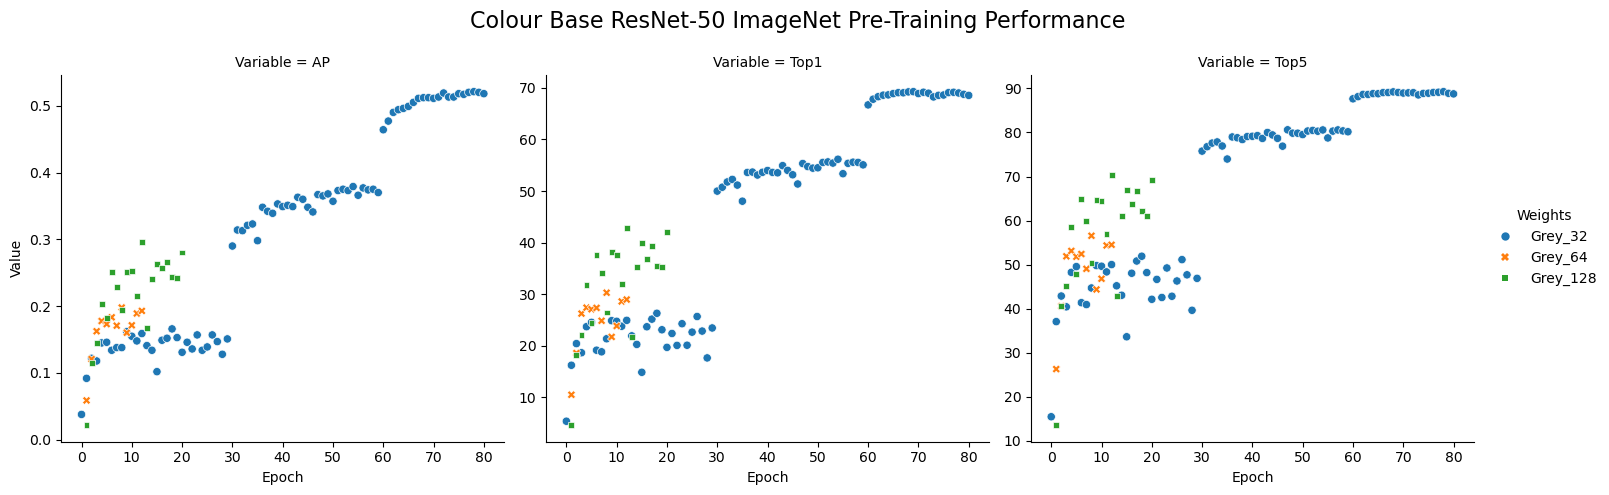

In [119]:
metricplot = sns.relplot(data=long_results.query("('Grey_32' in Weights | 'Grey_64' in Weights | 'Grey_128' in Weights ) & Epoch <= 80"), x="Epoch", y="Value", hue="Weights", col = "Variable", \
                         facet_kws={'sharey': False, 'sharex': True}, style="Weights", kind="scatter")
metricplot.fig.subplots_adjust(top=.85)
metricplot.fig.suptitle('Colour Base ResNet-50 ImageNet Pre-Training Performance', fontsize=16,)# weight='bold')

Text(0.5, 0.98, 'ResNet-50 ImageNet Pre-Training Performance')

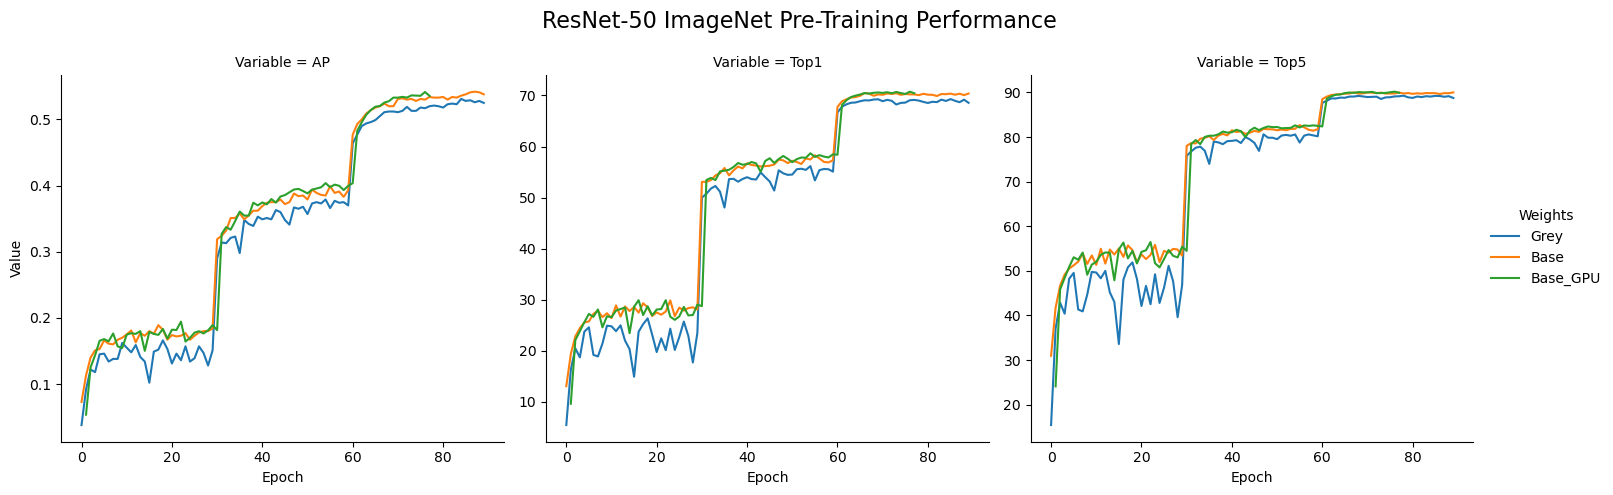

In [61]:
metricplot = sns.relplot(data=long_results[long_results["Epoch"]<=90], x="Epoch", y="Value", hue="Weights", col = "Variable", \
                         facet_kws={'sharey': False, 'sharex': True}, kind="line")
metricplot.fig.subplots_adjust(top=.85)
metricplot.fig.suptitle('ResNet-50 ImageNet Pre-Training Performance', fontsize=16,)# weight='bold')

Text(0.5, 0.98, 'ResNet-50 ImageNet Pre-Training Performance')

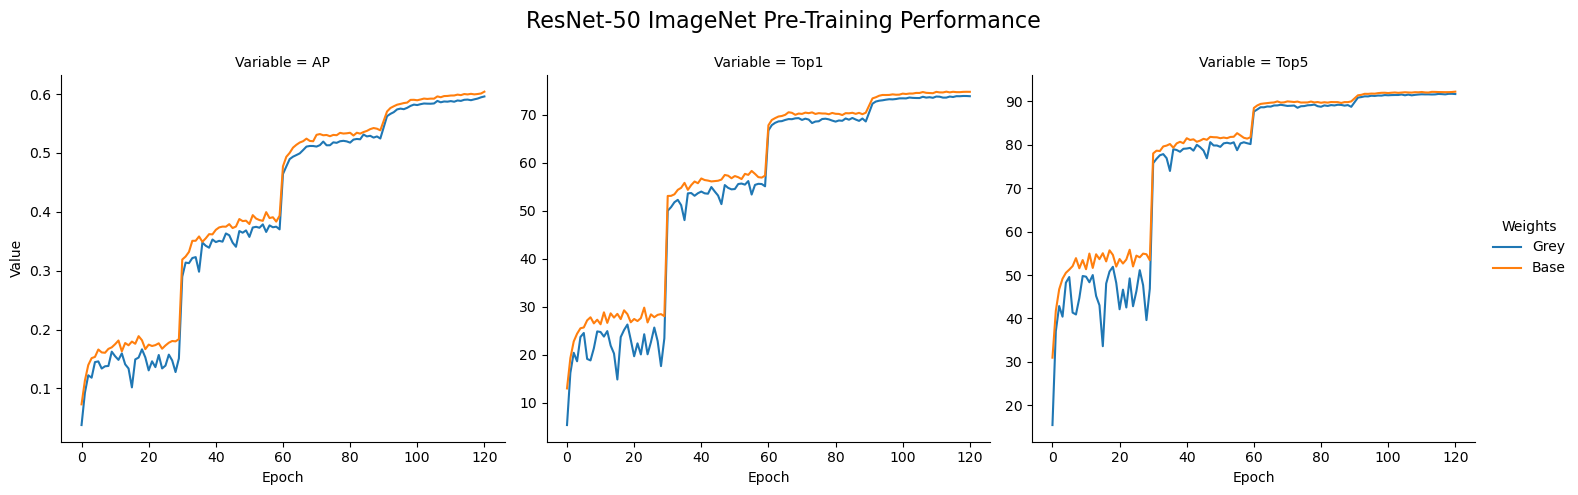

In [94]:
metricplot = sns.relplot(data=long_results, x="Epoch", y="Value", hue="Weights", col = "Variable", \
                         facet_kws={'sharey': False, 'sharex': True}, kind="line")
metricplot.fig.subplots_adjust(top=.85)
metricplot.fig.suptitle('ResNet-50 ImageNet Pre-Training Performance', fontsize=16,)# weight='bold')

Text(0.5, 0.98, 'ResNet-50 ImageNet Pre-Training Performance')

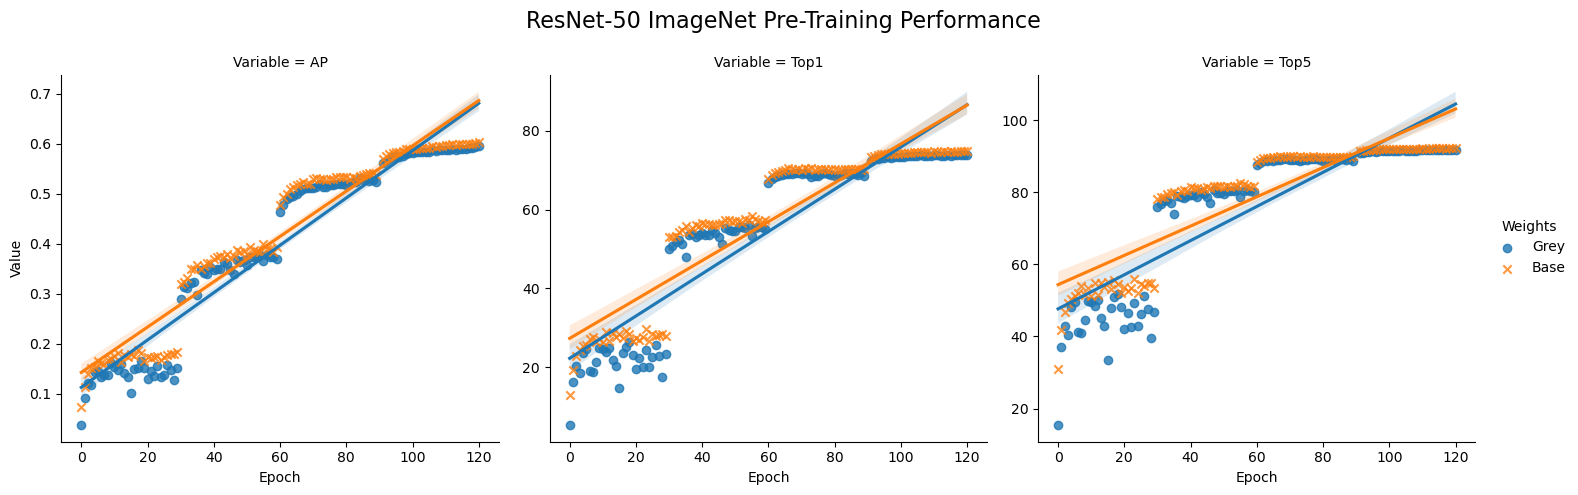

In [95]:
metricplot = sns.lmplot(data=long_results, x="Epoch", y="Value", hue="Weights", col = "Variable", \
                        facet_kws={'sharey': False, 'sharex': True},markers=['o', 'x'])
metricplot.fig.subplots_adjust(top=.85)
metricplot.fig.suptitle('ResNet-50 ImageNet Pre-Training Performance', fontsize=16,)# weight='bold')